In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import tensorflow as tf
import gc
import time
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import DBPS_TF_NN_util as d_util
import SBPS_TF_NN_util as s_util
import MH_TF_NN_util as mh_util

# Load samples
load your desire parameters in NNs by adjusting row1s, col1s, row2s and col2s

In [2]:
row1s = [7,10,10]
col1s = [130,250,200]
row2s = [12,14,7]
col2s = [170,200,300]
dbps_result = [[],[],[],[],[],[]]
sbps_result = [[],[],[],[],[],[]]
bps_result = [[],[],[],[],[],[]]
mh_result = [[],[],[],[],[],[]]    

In [8]:
# read dbps
d_route = '/home/user/chou/Py_BPSs_NN_TF/DBPS_weights'
folder = '/k-2_d-2_1e07_thin100'
d_setting = np.load(d_route + folder + '/DBPSsetting.npy')
d_data = '/theta0_-20_delta-2_part_'
now_part = 1
while(1):
    try:
        now_target = np.array(np.load(d_route + folder + d_data + str(now_part) + '.npy').tolist())
        count = 0
        for row1, col1, row2, col2 in zip(row1s,col1s,row2s,col2s):
            # result 
            dbps_result[count].extend(now_target[:, row1, col1])
            count += 1
            dbps_result[count].extend(now_target[:, row2, col2])
            count += 1
        now_part += 1
    except:
        print(str(count) + 'Finished')
        break

Finished


In [13]:
# read sbps
s_route = '/home/user/chou/Py_BPSs_NN_TF/SBPS_weights'
s_setting = np.load('/home/user/chou/Py_BPSs_NN_TF/SBPSsetting.npy')
s_data = '/SBPS_theta0_mini-batch_500_ref_10_part_'
folder = '/Keras_Ref10_interval1e-02_iter1e07'
now_part = 1
now_route = s_route
now_data = s_data
while(1):
    try:
        now_target = np.array(np.load(now_route + folder + now_data + str(now_part) + '.npy').tolist())
        count = 0
        for row1, col1, row2, col2 in zip(row1s,col1s,row2s,col2s):
            # result 
            sbps_result[count].extend(now_target[:, row1, col1])
            count += 1
            sbps_result[count].extend(now_target[:, row2, col2])
            count += 1
        now_part += 1
    except:
        print(str(now_part) + ' Finished')
        break

12 Finished


In [11]:
# read bps
b_route = '/home/user/chou/Py_BPSs_NN_TF/BPS_weights'
folder = '/Ref10_interval1e-03_iter1e06'
b_setting = np.load(b_route + folder + '/BPSsetting.npy')
b_data = '/SBPS_theta0_mini-batch_800_ref_100_part_'
folder = '/Ref100_interval1e-02'
now_part = 1
while(1):
    try:
        now_target = np.array(np.load(b_route + folder + b_data +  str(now_part) + '.npy').tolist())
        count = 0

        for row1, col1, row2, col2 in zip(row1s,col1s,row2s,col2s):
            # result 
            bps_result[count].extend(now_target[:, row1, col1])
            count += 1
            bps_result[count].extend(now_target[:, row2, col2])
            count += 1
        now_part += 1
    except:
        print(str(count) + 'Finished')
        break

Finished


# Trace plot

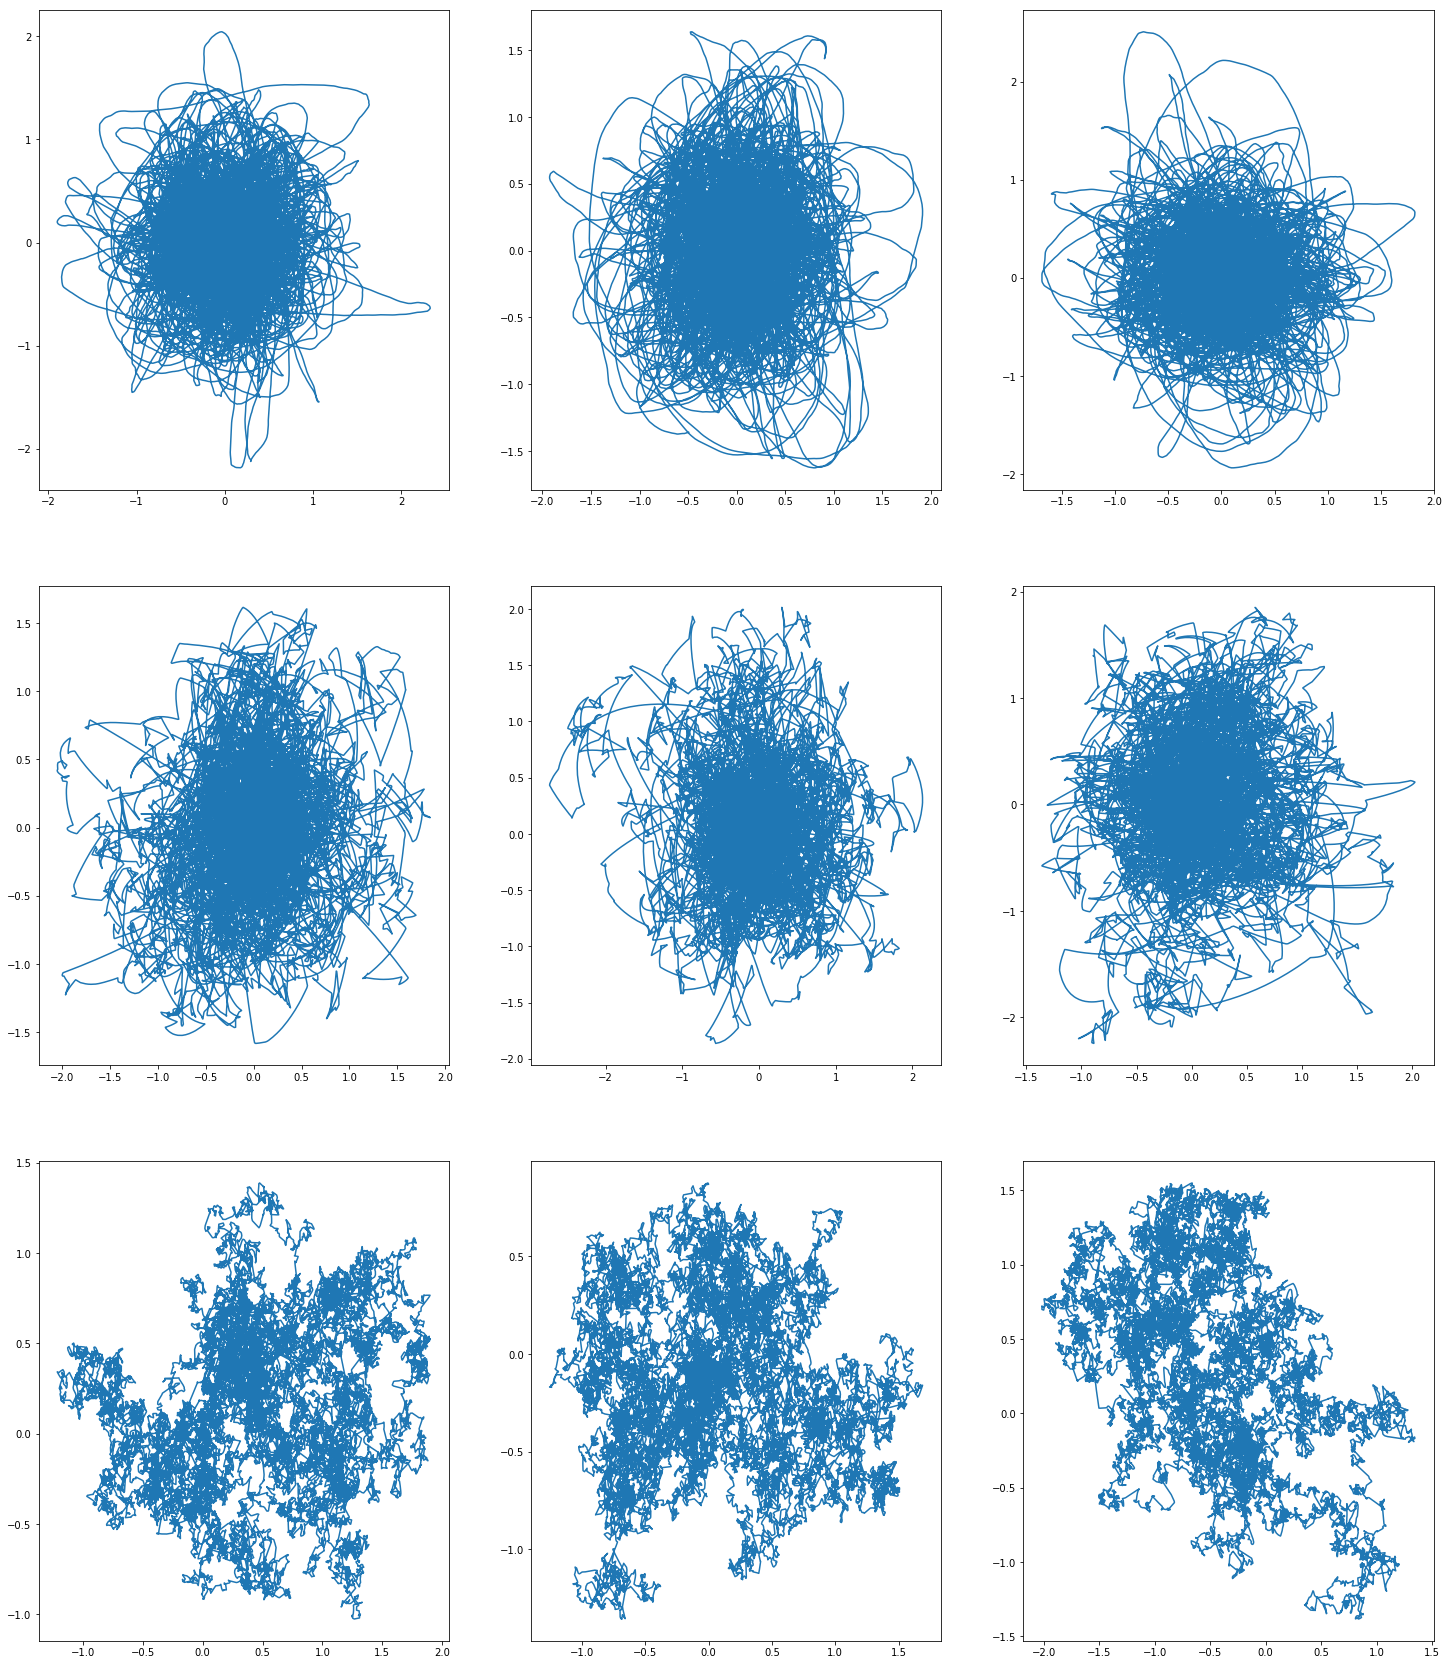

In [12]:
all_result = [dbps_result, sbps_result, bps_result]
fig, axs = plt.subplots(len(all_result), 3, figsize=(25,len(all_result)*5*2), tight_layout=False)
for i in range(len(all_result)):
    count = 0
    for j in range(3):
        axs[i][j].plot(all_result[i][count], all_result[i][count+1])
        count += 2

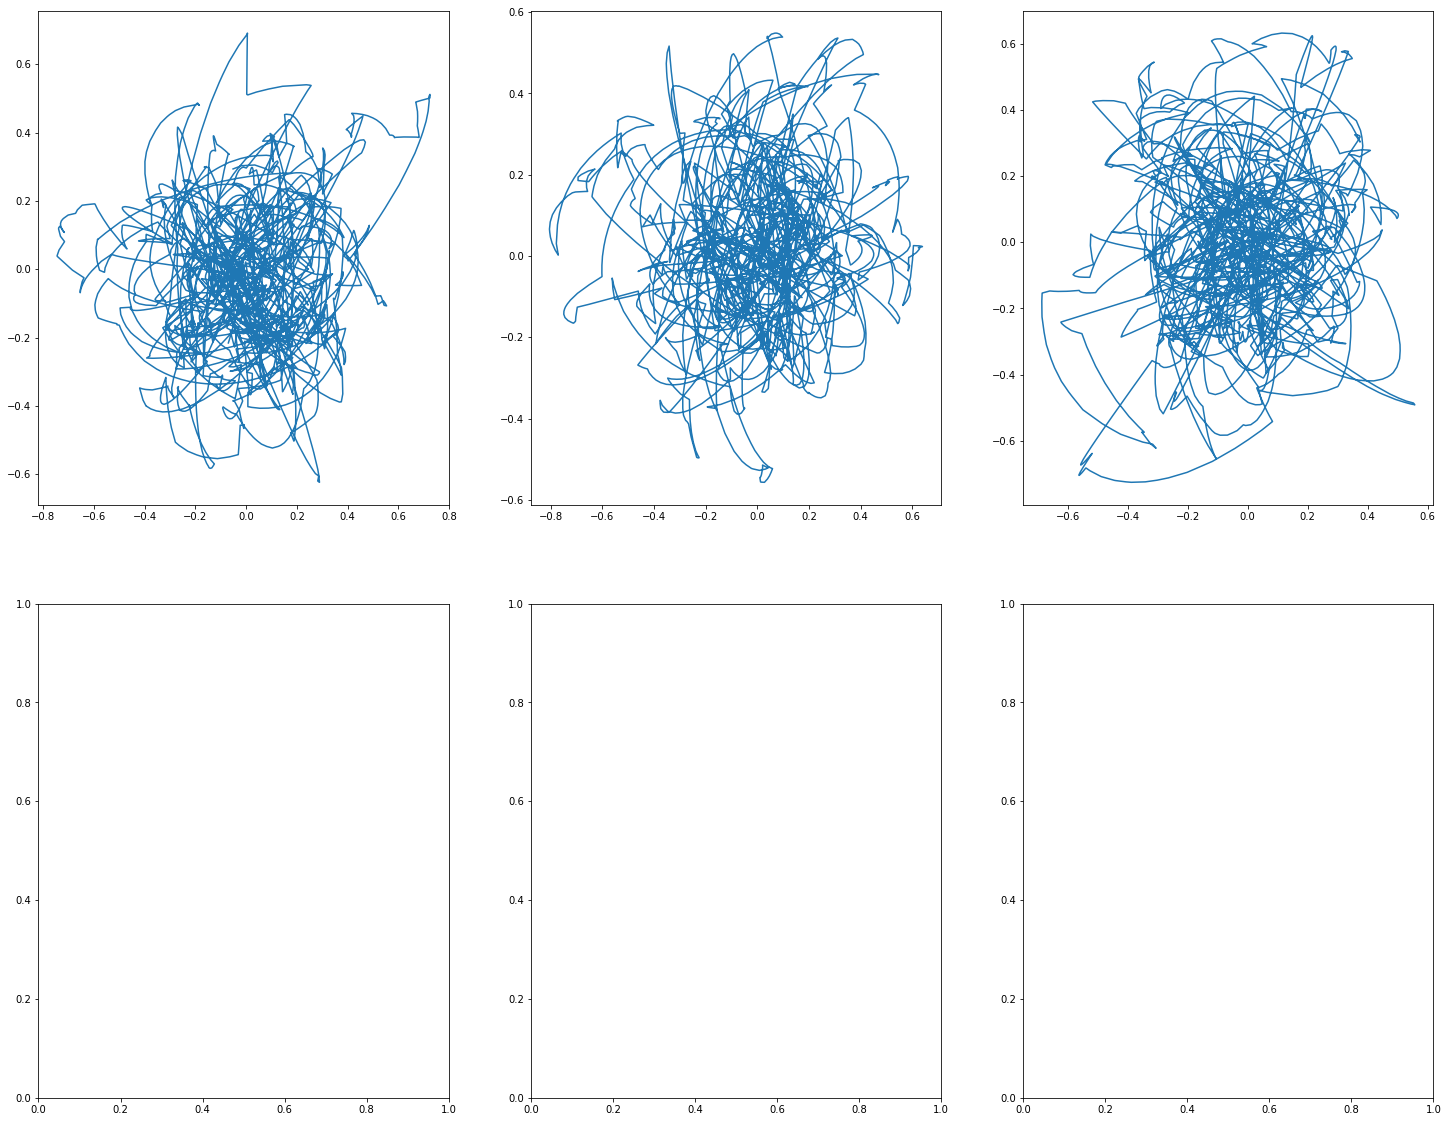

In [18]:
# all_setting = [d_setting, s_setting, b_setting]
all_result = [sbps_result]
all_setting = [s_setting]
fig, axs = plt.subplots(len(all_result)+1, 3, figsize=(25,(len(all_result)+1)*5*2), tight_layout=False)
for i in range(len(all_result)):
    count = 0
    for j in range(3):
        axs[i][j].plot(all_result[i][count][int(all_setting[i][0][2]):], all_result[i][count+1][int(all_setting[i][0][2]):])
        count += 2

# Density plot

/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


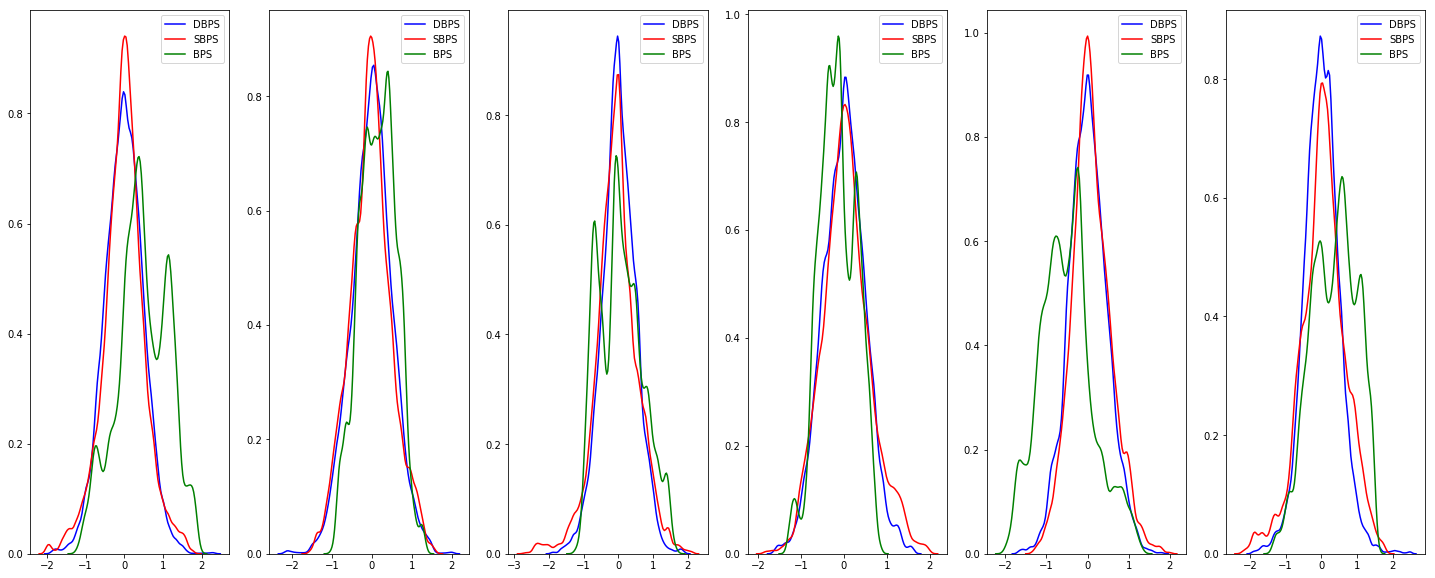

In [16]:
fig, axs = plt.subplots(1, 6, figsize=(25,1*5*2), tight_layout=False)

for i in range(6):
    sns.distplot(all_result[0][i], color = 'blue', label = 'DBPS', hist = False, ax = axs[i])
    sns.distplot(all_result[1][i], color = 'red', label = 'SBPS', hist = False, ax = axs[i])
    sns.distplot(all_result[2][i], color = 'green', label = 'BPS', hist = False, ax = axs[i])

/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


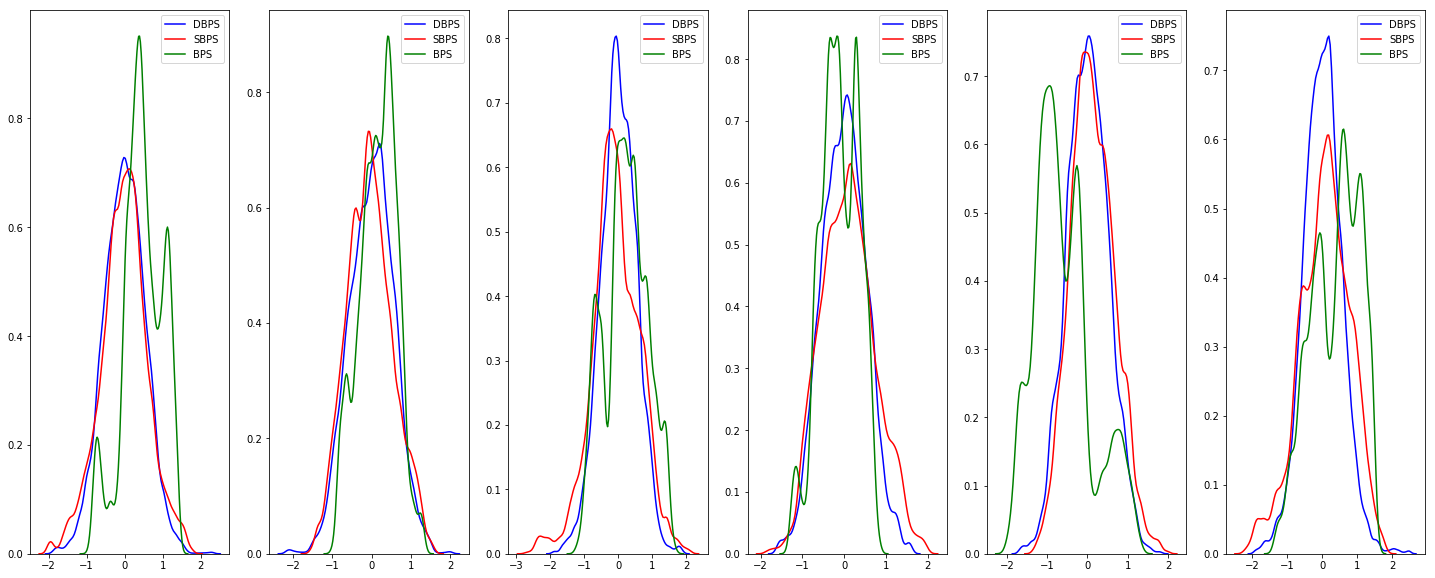

In [17]:
fig, axs = plt.subplots(1, 6, figsize=(25,1*5*2), tight_layout=False)

for i in range(6):
    sns.distplot(all_result[0][i][int(all_setting[0][0][2]):], color = 'blue', label = 'DBPS', hist = False, ax = axs[i])
    sns.distplot(all_result[1][i][int(all_setting[1][0][2]):], color = 'red', label = 'SBPS', hist = False, ax = axs[i])
    sns.distplot(all_result[2][i][int(15000):], color = 'green', label = 'BPS', hist = False, ax = axs[i])

# ESS/s plot

In [18]:
from statsmodels.tsa.stattools import acf
def ESS(n):
    total_acf = acf(n, nlags = len(n)-1, fft = True)
    return len(n)/(1+2*np.sum(total_acf))

parameter = 1
ESS_BPS = ESS(bps_result[parameter][int(b_setting[0][2]):])
ESS_DBPS = ESS(dbps_result[parameter][int(d_setting[0][2]):])
ESS_SBPS = ESS(sbps_result[parameter][int(s_setting[0][2]):])

No handles with labels found to put in legend.


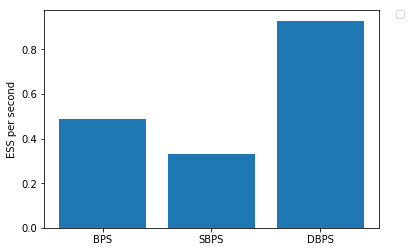

In [27]:
x = ['BPS', 'SBPS', 'DBPS']
y = [((np.array(ESS_BPS) / (b_setting[:,0]-b_setting[:,3])).ravel())[0], (np.array(ESS_SBPS) / (s_setting[:,0]-s_setting[:,3])).ravel(), (np.array(ESS_DBPS) / d_setting[:,0]).ravel()]
plt.bar(x,y)
plt.ylabel('ESS per second')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Exec time

No handles with labels found to put in legend.


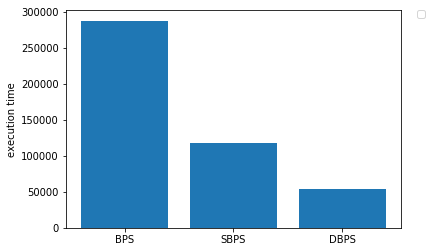

In [22]:
x = ['BPS', 'SBPS', 'DBPS']
y = [b_setting[:,1][0]*10,s_setting[:,1],d_setting[:,1]]
plt.bar(x,y)
plt.ylabel('execution time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Acc testing
might cost few mins to load the data

In [10]:
import numpy as np
import gc

# read sbps
sbps_theta0, sbps_theta1, sbps_bias0, sbps_bias1 = 0, 0, 0, 0
s_route = '/home/user/chou/Py_BPSs_NN_TF/SBPS_weights'
s_theta0 = '/SBPS_theta0_mini-batch_500_ref_10_part_'
s_theta1 = '/SBPS_theta1_mini-batch_500_ref_10_part_'
s_bias0 = '/SBPS_bias0_mini-batch_500_ref_10_part_'
s_bias1 = '/SBPS_bias1_mini-batch_500_ref_10_part_'
folder = '/Keras_Ref10_interval1e-02_iter1e07'
s_setting = np.load(s_route + folder + '/SBPSsetting.npy')
now_part = 1
burnin = int(s_setting[0][2])
counter = 0
over_switch = 0
while(1):
    try:
        now_theta0 = np.load(s_route + folder + s_theta0 + str(now_part) + '.npy')
        now_theta1 = np.load(s_route + folder + s_theta1 + str(now_part) + '.npy')
        now_bias0 = np.load(s_route + folder + s_bias0 + str(now_part) + '.npy')
        now_bias1 = np.load(s_route + folder + s_bias1 + str(now_part) + '.npy')
        now_shape = np.shape(now_bias1)[0]
        counter += now_shape
        if counter >= burnin and over_switch == 0:
            over_switch = 1
            start = burnin-counter+now_shape
            sbps_theta0 += np.sum(now_theta0[start:], axis = 0)
            sbps_theta1 += np.sum(now_theta1[start:], axis = 0)
            sbps_bias0 += np.sum(now_bias0[start:], axis = 0)
            sbps_bias1 += np.sum(now_bias1[start:], axis = 0)
        elif over_switch == 1:
            sbps_theta0 += np.sum(now_theta0, axis = 0)
            sbps_theta1 += np.sum(now_theta1, axis = 0)
            sbps_bias0 += np.sum(now_bias0, axis = 0)
            sbps_bias1 += np.sum(now_bias1, axis = 0)
        now_part += 1
        print(now_part)
        del now_theta0, now_theta1, now_bias0, now_bias1
    except:
        sbps_theta0 /= (counter - burnin)
        sbps_theta1 /= (counter - burnin)
        sbps_bias0 /= (counter - burnin)
        sbps_bias1 /= (counter - burnin)
        print(str(counter-burnin) + ' Samples')
        print(str(now_part) + ' Finished')
        break
gc.collect()

2
3
4
5
6
7
8
9
10
11
12
79539 Samples
12 Finished


320

In [2]:
import numpy as np
import gc

# dbps mean
dbps_theta0, dbps_theta1, dbps_bias0, dbps_bias1 = 0, 0, 0, 0
d_route = '/home/user/chou/Py_BPSs_NN_TF/DBPS_weights'
folder = '/k-2_d-2_1e07_thin100'
d_setting = np.load(d_route + folder + '/DBPSsetting.npy')
d_theta0 = '/theta0_-20_delta-2_part_'
d_theta1 = '/theta1_-20_delta-2_part_'
d_bias0 = '/bias0_-20_delta-2_part_'
d_bias1 = '/bias1_-20_delta-2_part_'
now_part = 1
while(1):
    try:
        now_theta0 = np.load(d_route + folder + d_theta0 + str(now_part) + '.npy').tolist()
        now_theta1 = np.load(d_route + folder + d_theta1 + str(now_part) + '.npy').tolist()
        now_bias0 = np.load(d_route + folder + d_bias0 + str(now_part) + '.npy').tolist()
        now_bias1 = np.load(d_route + folder + d_bias1 + str(now_part) + '.npy').tolist()
        if now_part == 1:
            dbps_theta0 = now_theta0
            dbps_theta1 = now_theta1
            dbps_bias0 = now_bias0
            dbps_bias1 = now_bias1
        else:
            dbps_theta0.extend(now_theta0)
            dbps_theta1.extend(now_theta1)
            dbps_bias0.extend(now_bias0)
            dbps_bias1.extend(now_bias1)
        now_part += 1
        del now_theta0, now_theta1, now_bias0, now_bias1
    except:

        print(str(now_part) + ' Finished')
        break
d_setting[0][2] = 30000
dbps_theta0 = np.array(dbps_theta0[int(d_setting[0][2]):])
dbps_theta1 = np.array(dbps_theta1[int(d_setting[0][2]):])
dbps_bias0 = np.array(dbps_bias0[int(d_setting[0][2]):])
dbps_bias1 = np.array(dbps_bias1[int(d_setting[0][2]):])
dbps_theta0 = np.mean(dbps_theta0, axis = 0)
dbps_theta1 = np.mean(dbps_theta1, axis = 0)
dbps_bias0 = np.mean(dbps_bias0, axis = 0)
dbps_bias1 = np.mean(dbps_bias1, axis = 0)

# np.save('dbps_theta0', dbps_theta0)
# np.save('dbps_theta1', dbps_theta1)
# np.save('dbps_bias0', dbps_bias0)
# np.save('dbps_bias1', dbps_bias1)

gc.collect()

11 Finished


0

In [3]:
import tensorflow as tf
def forward(X, theta0, theta1, bias0, bias1):
    X = tf.transpose(tf.convert_to_tensor(X, dtype = tf.float64))
    now = tf.matmul(theta0, X) + bias0
    now = tf.nn.relu(now)
    now = tf.matmul(theta1, now) + bias1
    now = tf.sigmoid(now)
    return now    
X_test = np.load('/home/user/chou/Py_BPSs_NN_TF/X_test_keras49.npy')
y_test = np.load('/home/user/chou/Py_BPSs_NN_TF/Y_test_keras49.npy')

## dbps, total samples : 100,000

In [5]:
# dbps
# burnin : 30000
dbps_y = forward(X_test, dbps_theta0, dbps_theta1, dbps_bias0, dbps_bias1)
dbps_y = np.where(dbps_y>=0.5,1,0)
np.sum(dbps_y[0] == y_test[:,1])

96

In [4]:
# dbps
# burnin : 50000
dbps_y = forward(X_test, dbps_theta0, dbps_theta1, dbps_bias0, dbps_bias1)
dbps_y = np.where(dbps_y>=0.5,1,0)
np.sum(dbps_y[0] == y_test[:,1])

96

In [4]:
# dbps
# burnin : 90000
dbps_y = forward(X_test, dbps_theta0, dbps_theta1, dbps_bias0, dbps_bias1)
dbps_y = np.where(dbps_y>=0.5,1,0)
np.sum(dbps_y[0] == y_test[:,1])

150

In [4]:
# dbps
# last one only
dbps_y = forward(X_test, dbps_theta0, dbps_theta1, dbps_bias0, dbps_bias1)
dbps_y = np.where(dbps_y>=0.5,1,0)
np.sum(dbps_y[0] == y_test[:,1])

193

## sbps, total samples : 82781

In [4]:
# sbps
# burnin : 30% of iterations
sbps_y = forward(X_test, sbps_theta0, sbps_theta1, sbps_bias0, sbps_bias1)
sbps_y = np.where(sbps_y>=0.5,1,0)
np.sum(sbps_y[0] == y_test[:,1])

151

In [4]:
# sbps
# burnin : 70000
sbps_y = forward(X_test, sbps_theta0, sbps_theta1, sbps_bias0, sbps_bias1)
sbps_y = np.where(sbps_y>=0.5,1,0)
np.sum(sbps_y[0] == y_test[:,1])

183

In [3]:
# sbps
# burnin : 80000
sbps_y = forward(X_test, sbps_theta0, sbps_theta1, sbps_bias0, sbps_bias1)
sbps_y = np.where(sbps_y>=0.5,1,0)
np.sum(sbps_y[0] == y_test[:,1])

190

In [3]:
# sbps
# burnin : 81000
sbps_y = forward(X_test, sbps_theta0, sbps_theta1, sbps_bias0, sbps_bias1)
sbps_y = np.where(sbps_y>=0.5,1,0)
np.sum(sbps_y[0] == y_test[:,1])

193

In [5]:
# sbps
# last one only
sbps_y = forward(X_test, sbps_theta0, sbps_theta1, sbps_bias0, sbps_bias1)
sbps_y = np.where(sbps_y>=0.5,1,0)
np.sum(sbps_y[0] == y_test[:,1])

181

## SBPS with Keras MNIST data set

In [11]:
sbps_y = forward(X_test, sbps_theta0, sbps_theta1, sbps_bias0, sbps_bias1)
sbps_y = np.where(sbps_y>=0.5,1,0)
np.sum(sbps_y[0] == y_test[:,1])

1901

In [12]:
np.sum(sbps_y[0] == y_test[:,1]) / len(y_test)

0.9547965846308388

## testing the difference between DBPS and SBPS (small data set)

In [3]:
all_diff = []
# dbps_theta0 = np.load('dbps_theta0.npy')
# dbps_theta1 = np.load('dbps_theta1.npy')
# dbps_bias0 = np.load('dbps_bias0.npy')
# dbps_bias1 = np.load('dbps_bias1.npy')
# sbps_theta0 = np.load('sbps_theta0.npy')
# sbps_theta1 = np.load('sbps_theta1.npy')
# sbps_bias0 = np.load('sbps_bias0.npy')
# sbps_bias1 = np.load('sbps_bias1.npy')
dbps_all = [dbps_theta0, dbps_theta1, dbps_bias0, dbps_bias1]
sbps_all = [sbps_theta0, sbps_theta1, sbps_bias0, sbps_bias1]
for i in range(4):
    diff = np.abs(dbps_all[i] - sbps_all[i])
    diff = diff.reshape(-1).tolist()
    all_diff.extend(diff)


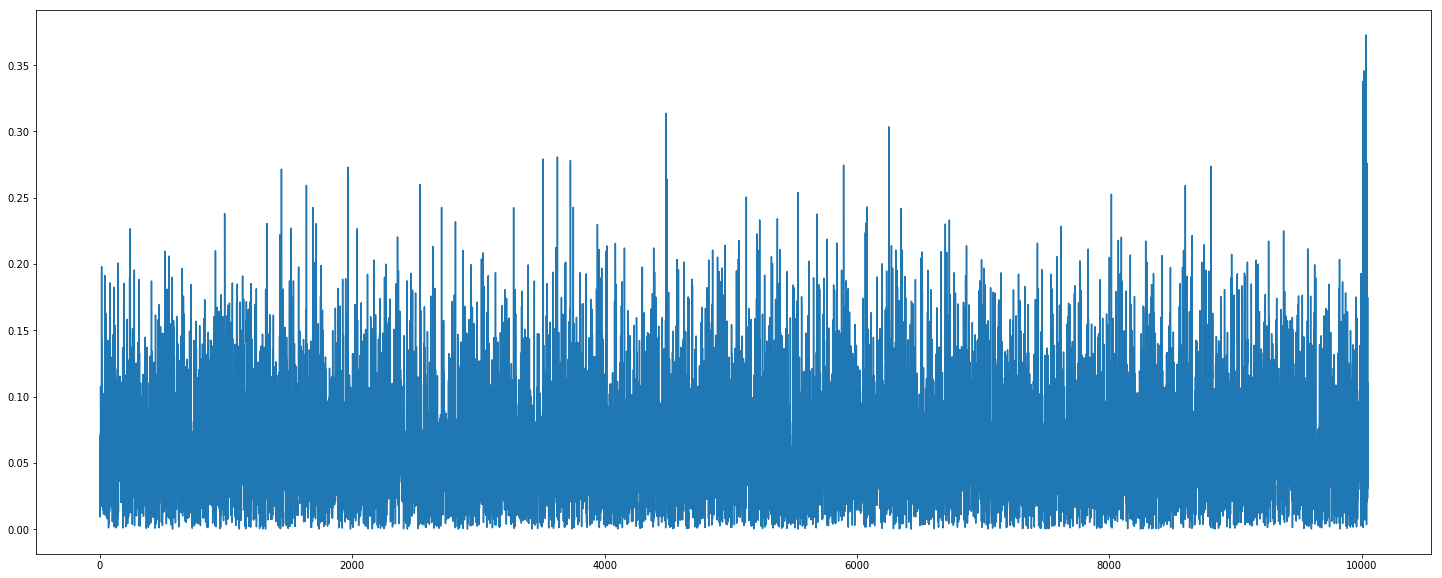

In [7]:
# burnin 30%
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(25,10), tight_layout=False)
axs.plot(list(range(10051)), all_diff)

/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


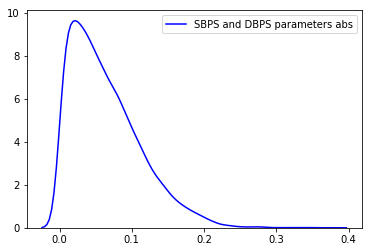

In [6]:
import seaborn as sns
sns.distplot(all_diff, color = 'blue', label = 'SBPS and DBPS parameters abs', hist = False)